<a href="https://colab.research.google.com/github/Y-Tee23/PRODIGY_ML_02/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [39]:
import pandas as pd
import numpy as np
from gap_statistic import OptimalK

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Import and Read Data**

In [40]:
data = pd.read_csv("Mall_Customers.csv")

In [41]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

We can tell this is a relative small dataset with 200 rows and 5 features

# **3. Data Description**

---



*   CustomerID - a code that refers to the customer
*   Gender - The gender of the customer
*   Age - Age of the customer
*   Income - Annual income of the customer in $ (12 = 12 000$)
*   Spending Score - A score determined by the store to represent the customer's spending behaviour


# **4. Unsupervised Learning**

---
First we need to get the number of clusters, k. We will use the Elbow Method


Before we do that, we need to use Standard Scaler to normalize our numerical values.

In [44]:
new_df = data.iloc[:, 2:]
sc = StandardScaler()
X = sc.fit_transform(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

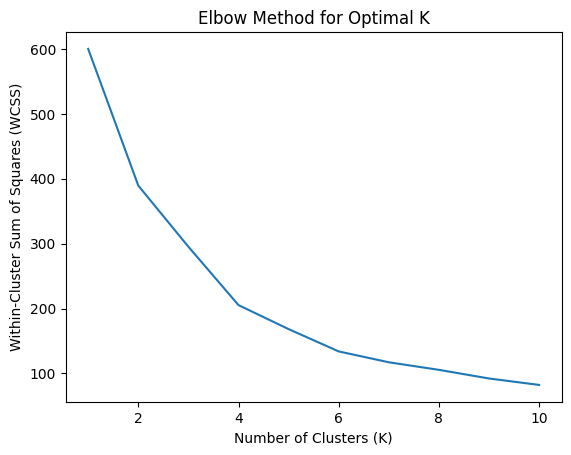

In [45]:
#Elbow method
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


From the visualization, we can see the turning point is a k=5. The correct number of clusters is 5.

In [46]:
model = KMeans(n_clusters= 5, random_state= 42)
model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [47]:
y_pred = model.predict(new_df)

In [48]:
dataset = data
dataset["Segment"] = y_pred.tolist()

In [49]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


# **5. Visualizing the Segmentation of Customers**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

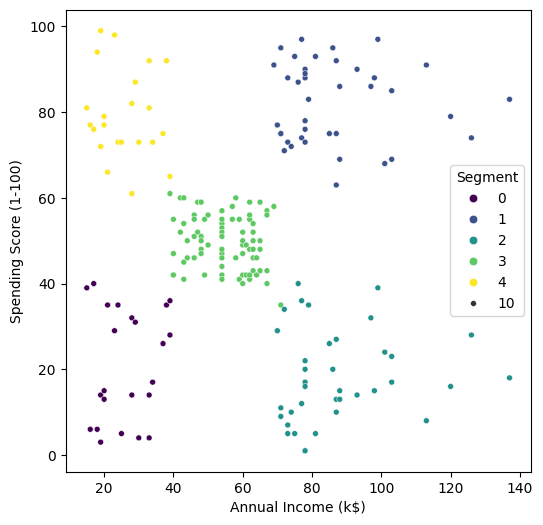

In [58]:
plt.figure(figsize= (6, 6))
sns.scatterplot(data= dataset, x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "Segment", palette= "viridis", size=10)


# **6. Applying Supervised Learning**

---
We can apply classification models
